In [1]:
# PCA is a linear dimensionality reduction technique that can be utilized for extracting information from a high dimensional space
# by projecting  it into a lower-dimensional sub-space .

#According to Wikipedia, PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables
# into a set of values of linearly uncorrelated variables called principal components.

In [2]:
# Where all you can apply PCA ?
# Data Visualization 
# speeding Machine learning(ML) Algorithm


# What is a Principal Component ?
# Principal components are the key to PCA; they represent whats's underneath the hood of your data. 
# In a layman term, when the dat is projected into a lower dimension (assume three dimensions)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

In [9]:
breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape # 30 Columns

(569, 30)

In [17]:
breast_data[[1,29]]

array([[2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.757e+01, 1.505e+01, 1.150e+02, 9.551e+02, 9.847e-02, 1.157e-01,
        9.875e-02, 7.953e-02, 1.739e-01, 6.149e-02, 6.003e-01, 8.225e-01,
        4.655e+00, 6.110e+01, 5.627e-03, 3.033e-02, 3.407e-02, 1.354e-02,
        1.925e-02, 3.742e-03, 2.001e+01, 1.952e+01, 1.349e+02, 1.227e+03,
        1.255e-01, 2.812e-01, 2.489e-01, 1.456e-01, 2.756e-01, 7.919e-02]])

In [18]:
# Labels 
breast_labels = breast.target
breast_labels.shape

(569,)

In [22]:
# Reshape labels to 569 X 1
labels = np.reshape(breast_labels, (569,1))
labels.shape

(569, 1)

In [28]:
# There are other Methods also
breast_labels.reshape(-1,1).shape

(569, 1)

In [33]:
labels[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [34]:
# After reshaping the labels, you will concatenate the data and labels along the second axis,
# Which means the final shape of the array will be 569,31

In [35]:
final_breast_data = np.concatenate([breast_data, labels], axis = 1)
final_breast_data.shape

(569, 31)

In [36]:
breast_dataset = pd.DataFrame(final_breast_data)
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [38]:
## Lets quickly print the features that are there in the breast cancer dataset
# These are the name of Columns 

features = breast.feature_names
print(len(features))
features

30


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [42]:
# You can see there are Only 30 features and there is not label Feature 
# Which is Output Column Name
# add "label" also in features

#features.append("label") # Error, not a lise

featuresa_label = np.append(features,"label")

In [44]:
# Rename the Column 
breast_dataset.columns = featuresa_label
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [45]:
## Since Output is 0 and 1 so Replace it with 
# 0 Benign 
# 1 Malignant

breast_dataset["label"].replace(0,"Benign", inplace=True)
breast_dataset["label"].replace(1,"Malignant", inplace = True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Visualizing the breast cancer data

In [47]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values # in Feature there is no label
x = StandardScaler().fit_transform(x) # Normalizing the features

In [51]:
x.shape

(569, 30)

In [53]:
## Lets Check wheather the normalized data has a mean of zero and standard deviation of one.
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [55]:
# Let's convert the normalized features into a tabular format with the help of DataFrame
feat_cols = ["feature"+ str(i) for i in range(x.shape[1])]

In [56]:
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [57]:
## Now comes the critical part, the next few lines of code will be projecting 
# the thirty-dimensional Breast Cancer data to two-dimensional principal components

# We will use the sklearn library to import the PCA module, and in the PCA method,
# We will pass the number of components (n_components = 2) and finally call fit_transform on the aggregate data

from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [59]:
# Lets Create a Data Frame that will have the principal component values for all 569 samples.
principalComponents_breast_df = pd.DataFrame(data=principalComponents_breast, columns=["PCA1","PCA2"])
principalComponents_breast_df.tail()

,PCA1,PCA2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [61]:
# explained_variance_ratio
## It will provide you with the amount of information or variance each principal
# component holds after projecting the data to a lowet dimensional subspace

pca_breast.explained_variance_ratio_, pca_breast.explained_variance_

(array([0.44272026, 0.18971182]), array([13.30499079,  5.7013746 ]))

In [62]:
# Let's plot the visualization of the 569 samples along the principal component -1 
# and principal component 2

# It should give you good insight into how your samples are distributed among the two classes

In [66]:
principalComponents_breast_df.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


<Figure size 432x288 with 0 Axes>

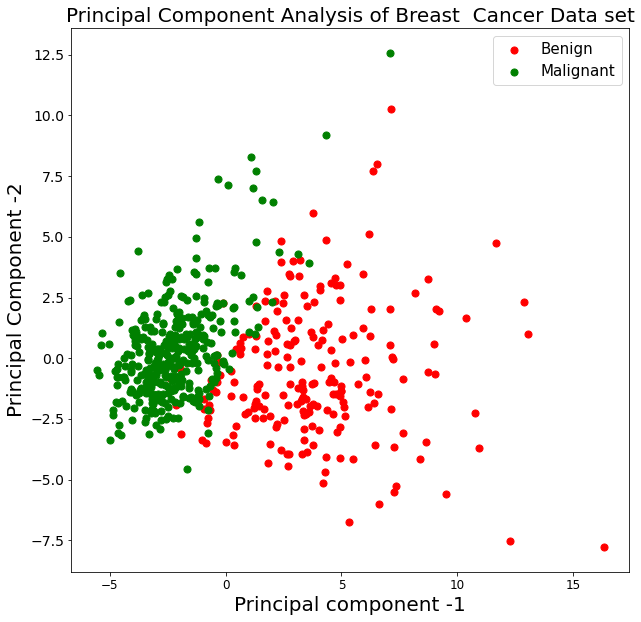

In [67]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize =12)
plt.yticks(fontsize = 14)
plt.xlabel("Principal component -1", fontsize = 20)
plt.ylabel("Principal Component -2", fontsize = 20)

plt.title("Principal Component Analysis of Breast  Cancer Data set", fontsize = 20)
targets = ["Benign","Malignant"]
colors = ["r", "g"]
for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset["label"] == target
    plt.scatter(principalComponents_breast_df.loc[indicesToKeep, "PCA1"],
               principalComponents_breast_df.loc[indicesToKeep, "PCA2"], c = color, s = 50)
plt.legend(targets, prop = {"size" : 15})